In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [34]:
df_loan=pd.read_csv("Faud Loan.csv", sep=",")
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
#Remove column loan_ID
df_loan.drop(['Loan_ID'],axis=1,inplace=True)
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
df_loan.drop(['Dependents'],axis=1,inplace=True)
df_loan

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


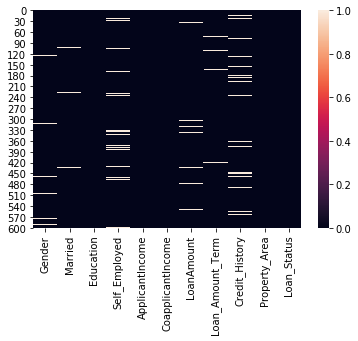

In [37]:
sb.heatmap(df_loan.isnull())
#nullvalues are present.

In [38]:
#Replace null values in dataset with 0
df_loan.replace(np.nan, 0, inplace=True)

In [39]:
df_loan.isnull().sum()
#no null values present anymore

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
list1=['Gender','Education','Property_Area','Married','Self_Employed','Loan_Status']
for val in list1:
    df_loan[val]=le.fit_transform(df_loan[val].astype(str))

In [41]:
df_loan

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,1,5849,0.0,0.0,360.0,1.0,2,1
1,2,2,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,2,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,2,2,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,2,1,0,1,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,1,2900,0.0,71.0,360.0,1.0,0,1
610,2,2,0,1,4106,0.0,40.0,180.0,1.0,0,1
611,2,2,0,1,8072,240.0,253.0,360.0,1.0,2,1
612,2,2,0,1,7583,0.0,187.0,360.0,1.0,2,1


In [42]:
df_loan.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.775244,1.643322,0.218241,1.081433,5403.459283,1621.245798,141.166124,334.201954,0.773616,1.037459,0.687296
std,0.465767,0.489511,0.413389,0.423472,6109.041673,2926.248369,88.340630,82.183884,0.418832,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,2877.500000,0.000000,98.000000,360.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,1.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,0.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [43]:
x=df_loan.iloc[:,0:-1]
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,0,1,5849,0.0,0.0,360.0,1.0,2
1,2,2,0,1,4583,1508.0,128.0,360.0,1.0,0
2,2,2,0,2,3000,0.0,66.0,360.0,1.0,2
3,2,2,1,1,2583,2358.0,120.0,360.0,1.0,2
4,2,1,0,1,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,1,2900,0.0,71.0,360.0,1.0,0
610,2,2,0,1,4106,0.0,40.0,180.0,1.0,0
611,2,2,0,1,8072,240.0,253.0,360.0,1.0,2
612,2,2,0,1,7583,0.0,187.0,360.0,1.0,2


In [44]:
y=df_loan.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [52]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print('Accuracy Score = ',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv, x, y, cv=5)
print('Y prediction values ')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Accuracy Score =  [0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]
Mean Scores 0.6872984139677463
Standard Deviation 0.0036872105184800976
Y prediction values 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

0.6872964169381107

In [56]:
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print('Score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(mnb, x, y, cv=5)
print('Y prediction values ')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat


from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)


Score: [0.45528455 0.5203252  0.44715447 0.5203252  0.49180328]
Mean Scores 0.48697854191656675
Standard Deviation 0.03110544406878142
Y prediction values 
[1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1
 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 0 0 1 

0.48697068403908794

In [61]:
knn=KNeighborsClassifier()

score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print('Accuracy Score = ',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(knn, x, y, cv=5)
print('Y prediction values ')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat


from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)


Accuracy Score =  [0.67741935 0.62903226 0.5483871  0.62903226 0.59016393 0.6557377
 0.60655738 0.60655738 0.6557377  0.59016393]
Mean Scores 0.618878900052882
Standard Deviation 0.036430950970504965
Y prediction values 
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 1 

0.6172638436482085

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scale = StandardScaler()

In [64]:
x = scale.fit_transform(x)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=45)

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [69]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)

In [73]:
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))

0.75
[[20 28]
 [ 6 82]]


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predlr))

              precision    recall  f1-score   support

           0       0.77      0.42      0.54        48
           1       0.75      0.93      0.83        88

    accuracy                           0.75       136
   macro avg       0.76      0.67      0.68       136
weighted avg       0.75      0.75      0.73       136



In [ ]:
#Saving Logistic Regression model
from sklearn.externals import joblib
joblib.dump(lr, "Fraud Loan_lr.pkl")